In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
data.sample(5)

,Unnamed: 0,TV,radio,newspaper,sales
174,175,222.4,3.4,13.1,11.5
115,116,75.1,35.0,52.7,12.6
198,199,283.6,42.0,66.2,25.5
187,188,191.1,28.7,18.2,17.3
192,193,17.2,4.1,31.6,5.9


In [3]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


in every column there are 200 non-null floaat value except "Unnamed: 0" it is of integer data type that also has 200 records.

In [6]:
data.columns.tolist()

['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales']

TV: It is the colmns through which the sales of the production are dependent while it is independent & is our feature.

radio It is the colmns through which the sales of the production are dependent while it is independent & is our feature.

newspaper:It is the column through which sales of the production are dependent while it is independent & is our feature 

sales:it is our label i.e. dependent on all features.


# EDA

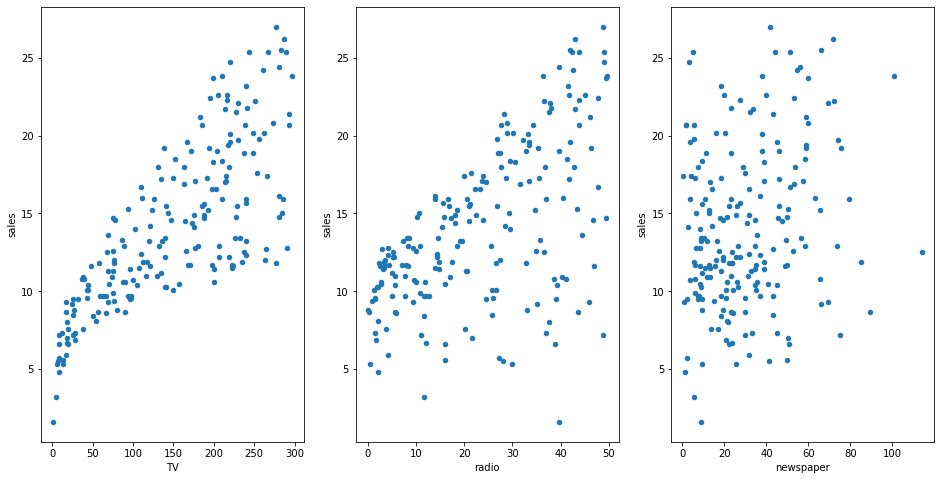

In [7]:
fig,axs=plt.subplots(1,3)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot.scatter(x='newspaper',y='sales',ax=axs[2])
plt.show()

Sales v/s TV: Here we can see that there is some linear relation between them as they are linearly dependent.

Sales v/ radio: here we analyse that there is some linear relation and seems to be like consists outliers too that we                  further analyse by using boxplot.

Sales v/s newspaper: Here we see there not such linear relation between them. but we have to do further analysis to make sure.

C:\Users\AT SYSTEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AT SYSTEM\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\AT SYSTEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AT SYSTEM\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.w

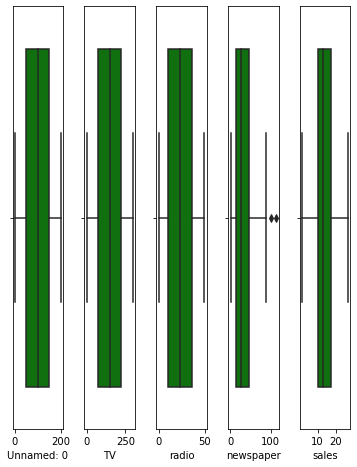

In [8]:
collist=data.columns.values
ncol=30
nrow=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data[collist[i]],orient='v',color='green')
    plt.tight_layout()

Here we come to know that in newsaper there are some outliers. while in all other columns there is no outliers

C:\Users\AT SYSTEM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AT SYSTEM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AT SYSTEM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

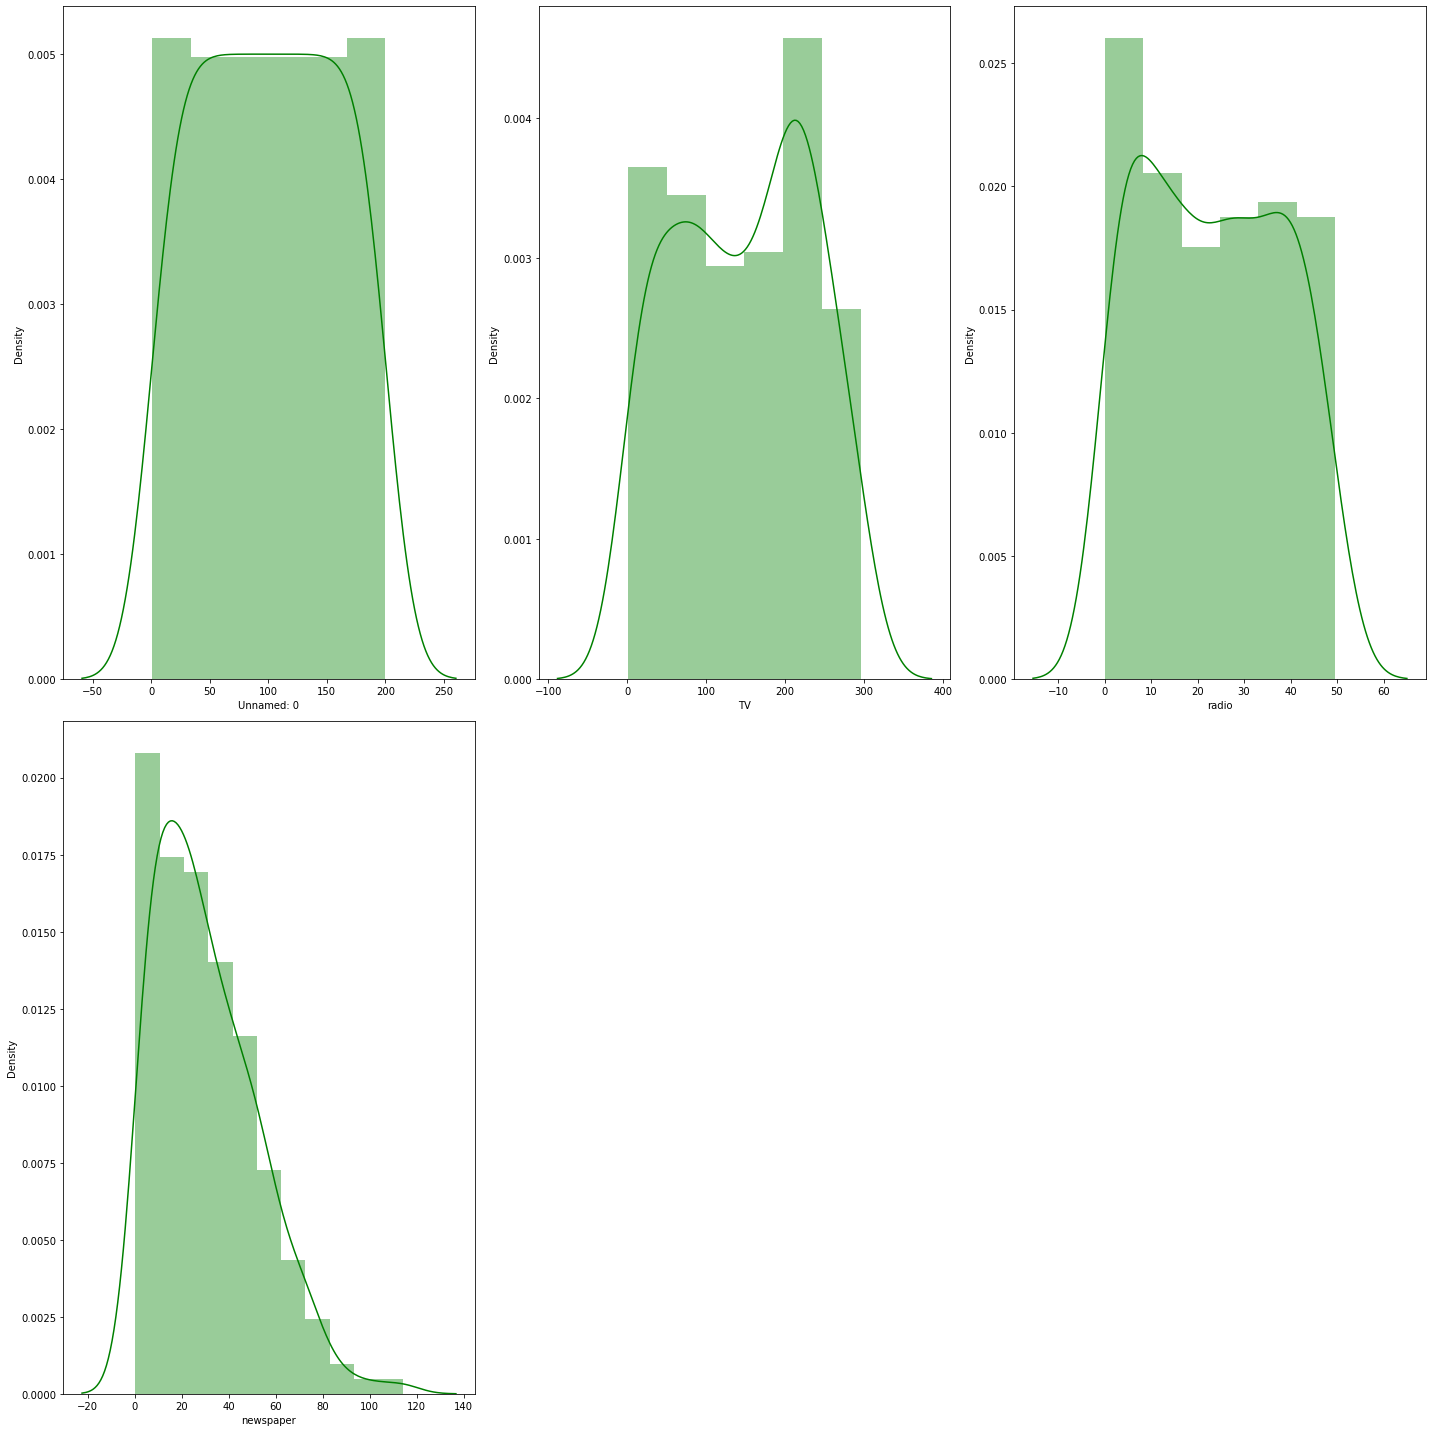

In [9]:
plt.figure(figsize=(20,20))
graph=1
for col in data.iloc[:,:-1]:
    if graph<5:
    
        plt.subplot(2,3,graph)
        sns.distplot(data[col],color='green')
    graph+=1
plt.tight_layout()

Its seems like the newspaper column is skewed. It is not symmetric while all other seems to be symmetric.

In [10]:
data.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

from above information we can conclude that the newspaper is skewed as it is not in range -0.5 to 0.5

<AxesSubplot:>

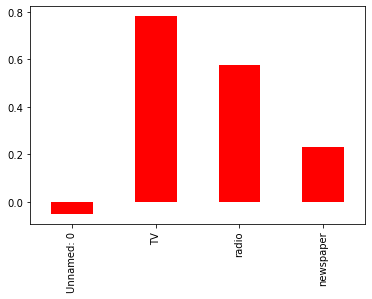

In [11]:
data[['Unnamed: 0','TV','radio','newspaper']].corrwith(data['sales']).plot(kind='bar',color='red')

Here we can see the relation the features with the target. we analyse that the "sales" is highly dependent on the feature i.e."TV" then "radio" then "newspaper" & then the "Unnamed: 0"

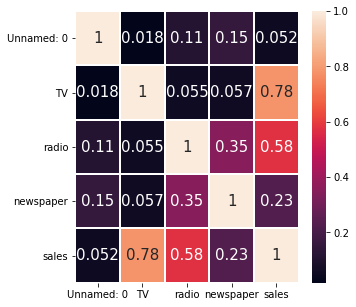

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.show()

 we can see there is no multi-colinearity. And the TV gives 78%, radio gives 58%, newspaper gives 23% contribution to predict the sales. As the the Unnamed:0 column is nominal that we can drop and also contribute 5%.

# Hypothesis testing & p_value

Ho: No relationship exists between TV & sales, radio & sales, newspaper & sales.

H1: reltionship exists between tv & sales, radio & sales, newspaper & sales.

In [13]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV+radio+newspaper',data=data).fit()

In [14]:
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

TV,radio rejects to accept the null hypothesis as its p_valus is less that 0.05 while newspaper accepts the null hypothesis as its pvalues is greter than than 0.05

In [15]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        02:39:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Standard Errors assume that the covariance matrix of the errors is correctly specified.
here we an see applying newspaper, radio and TV columns for fetures to predict the sales the adjusted r-squared value is 0.89.

In [16]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV+radio',data=data).fit()

In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           4.83e-98
Time:                        02:39:57   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion of EDA

we conclde that the column:

Unnamed:0 -> it is nominal variable that contributing 5% to predict. so, its better to remove this column from features.

TV:---> It is continous variable that contributing 78%  for the prediction of sale. And its p_value is less than 0.05 so it can be used as feature.

radio:---> It is continous variable that contributing 58%  for the prediction of sale. And its p_value is less than 0.05 so it can be used as feature.

newspaper:--->It is continous variable that contributing 23%  for the prediction of sale. But its p_value is more than 0.05 so it 

# Data Cleaning

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.drop(columns=["Unnamed: 0","newspaper"],axis=1,inplace=True)

removed columns "Unnamed:0", "newspaper"

In [20]:
data.shape

(200, 3)

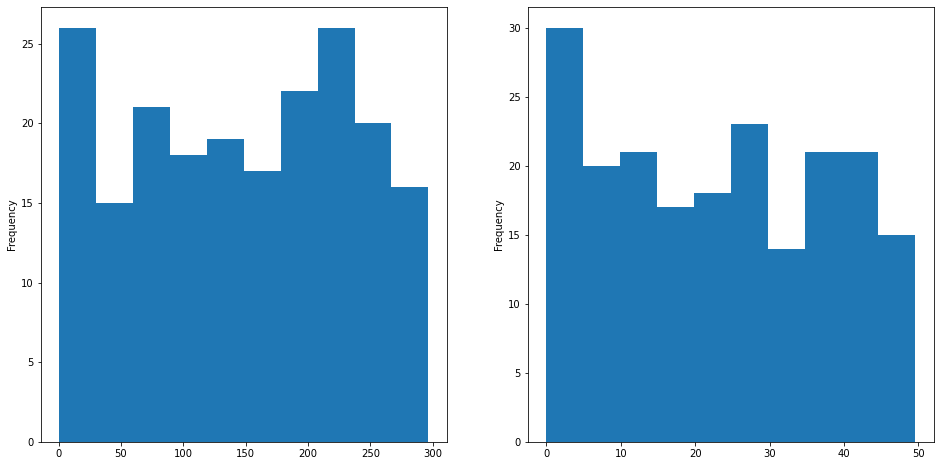

In [21]:
fig,axs=plt.subplots(1,2 )
data['TV'].plot(kind='hist',ax=axs[0],figsize=(16,8))
data["radio"].plot(kind='hist',ax=axs[1])
plt.show()

TV,radio are distributed normally and not skewed

In [22]:
data.skew()

TV      -0.069853
radio    0.094175
sales    0.407571
dtype: float64

all columns are in range -0.5 to 0.5 thats mean no column is skewed.

C:\Users\AT SYSTEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AT SYSTEM\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\AT SYSTEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AT SYSTEM\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.w

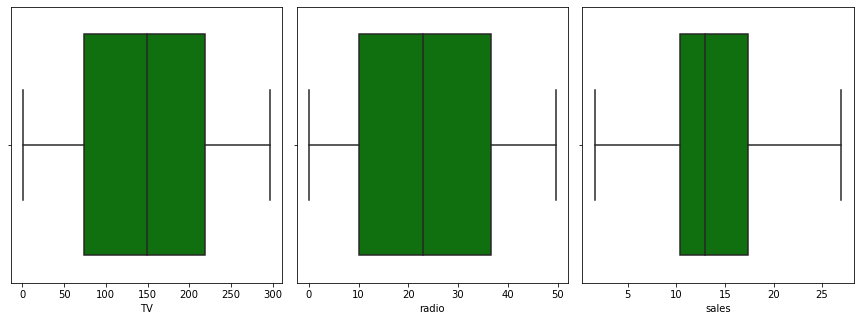

In [23]:
collist=data.columns.values
plt.figure(figsize=(20,88))
for i in range(0,len(collist)):
    plt.subplot(20,5,i+1)
    sns.boxplot(data[collist[i]],orient='v',color='green')
    plt.tight_layout()

there are no outliers in the data

In [24]:
data.shape

(200, 3)

In [25]:
data_loss=(200-200)/200
data_loss

0.0

data is not lost before cleaning And after cleaning there are 200 records. So, data lost is 0.0%

In [26]:
data.describe()

,TV,radio,sales
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,14.022500
std,85.854236,14.846809,5.217457
min,0.700000,0.000000,1.600000
25%,74.375000,9.975000,10.375000
50%,149.750000,22.900000,12.900000
75%,218.825000,36.525000,17.400000
max,296.400000,49.600000,27.000000


we can see that the TV has min value i.e. 0.7 and radio has min value i.e. 0.0 that can be quite possible. Sometimes the producer is not spending much money on advertisement and also got the benefits.

# Model Deployment

In [27]:
X=data[["TV","radio"]]
Y=data.sales

splitting data into fetures & labels.

Here X is our features & Y is our label.

In [28]:
mms=MinMaxScaler()
X_scaled=mms.fit_transform(X)

Standarized the features using MinMaxScalar technique

In [29]:
max_accuracy=0
for i in range(1,150):
    X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    Y_pred=lr.predict(X_test)
    accuracy=r2_score(Y_test,Y_pred)*100
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        rs=i
print(f"The highest accuracy is {max_accuracy} at random state {rs}")
    

The highest accuracy is 95.22328786133319 at random state 92


In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=rs)

we split the training dataset & test dataset at random state rs i.e. 92 where we get the high accuracy

In [31]:
Linear=LinearRegression()
DecisionTree=DecisionTreeRegressor()
knn=KNeighborsRegressor()
RandomForest=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()

In [32]:
algo=[Linear,DecisionTree,RandomForest,knn,AdaBoost]
acc_models={}
for model in algo:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print("-"*60)
    acc_models[model]=round(r2_score(Y_test,Y_pred)*100,1)
    print(f"The model {model} has:: \n\t Accuracy :: {round(r2_score(Y_test,Y_pred)*100,1)}% \n\t Mean Absolute Error is :: {mean_absolute_error(Y_test,Y_pred)} \n\t Mean Squared Error is :: {mean_squared_error(Y_test,Y_pred)} \n\t Root Mean Squared Error is :: {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
    print("-"*60)
    print("\n")

------------------------------------------------------------
The model LinearRegression() has:: 
	 Accuracy :: 95.2% 
	 Mean Absolute Error is :: 0.9316575153742803 
	 Mean Squared Error is :: 1.475346954384468 
	 Root Mean Squared Error is :: 1.2146386106099492
------------------------------------------------------------


------------------------------------------------------------
The model DecisionTreeRegressor() has:: 
	 Accuracy :: 97.1% 
	 Mean Absolute Error is :: 0.6975 
	 Mean Squared Error is :: 0.8877499999999998 
	 Root Mean Squared Error is :: 0.9422048609511627
------------------------------------------------------------


------------------------------------------------------------
The model RandomForestRegressor() has:: 
	 Accuracy :: 98.6% 
	 Mean Absolute Error is :: 0.5132749999999975 
	 Mean Squared Error is :: 0.43198722499999515 
	 Root Mean Squared Error is :: 0.6572573506625812
------------------------------------------------------------


---------------------

In [33]:
acc_models

{LinearRegression(): 95.2,
 DecisionTreeRegressor(): 97.1,
 RandomForestRegressor(): 98.6,
 KNeighborsRegressor(): 98.5,
 AdaBoostRegressor(): 96.2}

we get the maximum r2-score of each model

# Crooss-Vaidation of the model

In [34]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,10):
        cvS=cross_val_score(model,X_scaled,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LinearRegression()
-------------------------


Mean CV Score of model LinearRegression():: 0.8942166468026784 at k-fold::2

Mean CV Score of model LinearRegression():: 0.8931635501481656 at k-fold::3

Mean CV Score of model LinearRegression():: 0.8916530235661282 at k-fold::4

Mean CV Score of model LinearRegression():: 0.889282957306453 at k-fold::5

Mean CV Score of model LinearRegression():: 0.8910268337384196 at k-fold::6

Mean CV Score of model LinearRegression():: 0.887824825599243 at k-fold::7

Mean CV Score of model LinearRegression():: 0.8845638944511245 at k-fold::8

Mean CV Score of model LinearRegression():: 0.8839789119628066 at k-fold::9


DecisionTreeRegressor()
-------------------------


Mean CV Score of model DecisionTreeRegressor():: 0.9376498144089187 at k-fold::2

Mean CV Score of model DecisionTreeRegressor():: 0.9588735632167639 at k-fold::3

Mean CV Score of model DecisionTreeRegressor():: 0.9592548612313452 at k-fold::4

Mean CV Score of model DecisionTreeRegr

In [35]:
CVmodel

{'LinearRegression()': [0.8942166468026784],
 'DecisionTreeRegressor()': [0.9619635290235438],
 'RandomForestRegressor()': [0.9818593238223654],
 'KNeighborsRegressor()': [0.9708037342782869],
 'AdaBoostRegressor()': [0.9608805344326189]}

we can see the maximun CV score of each model

In [36]:
acc_value=list(acc_models.values ( ))

m=list(CVmodel.keys())

print("The least difference between the r2-score and CV score of each model is::\n")
for i in range(5):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-acc_value[i]),2)}")

The least difference between the r2-score and CV score of each model is::

LinearRegression()::5.78
DecisionTreeRegressor()::0.9
RandomForestRegressor()::0.41
KNeighborsRegressor()::1.42
AdaBoostRegressor()::0.11


model Adaboost Regressor we get the least value i.e. the difference between the r2-score and cvScore of this model is 0.25 . So, AdaBoost is the best model to use for this problem.

# Plotting regplot graph for Adaboost model

C:\Users\AT SYSTEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


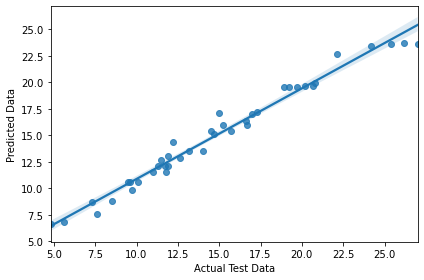

In [37]:
ada=AdaBoostRegressor()
ada.fit(X_train,Y_train)
Y_pred=ada.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

we analyse that the data points are very close to the best fit line. That means the residual is less.

# Regularization

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
lasso=Lasso()
parameters={"alpha":np.arange(0.0001,0.1,0.001),'normalize':[True,False],'max_iter':[1000,1500,2000]}
grid=GridSearchCV(lasso,parameters)
grid.fit(X_train,Y_train)
grid.best_params_

{'alpha': 0.0001, 'max_iter': 1000, 'normalize': False}

we get the best paameter for Lasso. So, that we can see our model is overfitted/underfitted or not.

In [40]:
lasso=Lasso(alpha= 0.0001, max_iter= 1000, normalize=False)
lasso.fit(X_train,Y_train)
pred=lasso.predict(X_test)
r2_score(Y_test,pred)*100

95.22294345777537

we can see that our model is not overfitted or underfitted as the r2 scoe Lasso model i.e. 95.22 is less or almost similiar with AdaBosst regressor model r2_score that is 95.7.

# Hyper parameter Tuning

In [44]:
params={"base_estimator":[Linear,DecisionTree,RandomForest],"n_estimators":[43,45,47],'learning_rate':[1.1,1.2,1.3],"loss":['linear','square','exponentia']}

In [43]:
grid.best_estimator_

AdaBoostRegressor(base_estimator=RandomForestRegressor(), learning_rate=1.1,
                  n_estimators=47)

In [45]:
ada=AdaBoostRegressor(base_estimator=RandomForestRegressor(), learning_rate=1.3, n_estimators=47)
ada.fit(X_train,Y_train)
Y_pred=ada.predict(X_test)

# Model evaluation

In [50]:
print(f"The model AdaBoost Regressor has:: \n\t Accuracy :: {round(r2_score(Y_test,Y_pred)*100,1)}% \n\t Mean Absolute Error is :: {mean_absolute_error(Y_test,Y_pred)} \n\t Mean Squared Error is :: {mean_squared_error(Y_test,Y_pred)} \n\t Root Mean Squared Error is :: {np.sqrt(mean_squared_error(Y_test,Y_pred))}")


The model AdaBoost Regressor has:: 
	 Accuracy :: 98.9% 
	 Mean Absolute Error is :: 0.45182500000000153 
	 Mean Squared Error is :: 0.3544922249999982 
	 Root Mean Squared Error is :: 0.5953924965936321


The model AdaBoost Regressor has:: 
	 Accuracy :: 98.9% 
	 Mean Absolute Error is :: 0.43762500000000026 
	 Mean Squared Error is :: 0.33584892499999813 
	 Root Mean Squared Error is :: 0.5795247406280409
Here we can see that our accuracy has increased & The mean_absolute Error ,Mean_sqaured_error, Root_mean_sqaured_error has decreased.

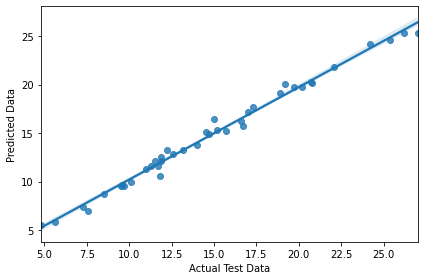

In [51]:
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

we can see that the points are now much closer than the earlier adaboost model with default parameter to the best fit line, Its due to decrease in mean absolute error, mean Squared Error,& Root mean squared error.

# Saving model

In [52]:
import joblib
joblib.dump(ada,'Advertisement_model.obj')

['Advertisement_model.obj']